from google.colab import drive
drive.mount('/content/drive')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Subset
from torchvision import datasets, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import os
import torchvision


# resnet 18 latest

Original train set has 895 samples
Train set has 716 samples
Validation set has 179 samples


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 3/3 [00:00<00:00,  3.05it/s]


[Epoch 1/10] Train Loss: 0.7830, Train Acc: 0.7752, Valid Loss: 0.8439, Valid Acc: 0.8122, Precision: 0.8040, Recall: 0.8156, F1: 0.7513, ROC-AUC: 0.5998


100%|██████████| 3/3 [00:00<00:00,  3.53it/s]


[Epoch 2/10] Train Loss: 0.5755, Train Acc: 0.8199, Valid Loss: 0.8427, Valid Acc: 0.8110, Precision: 0.7712, Recall: 0.8101, F1: 0.7552, ROC-AUC: 0.6407


100%|██████████| 3/3 [00:00<00:00,  3.25it/s]


[Epoch 3/10] Train Loss: 0.4731, Train Acc: 0.8359, Valid Loss: 0.7089, Valid Acc: 0.7719, Precision: 0.7534, Recall: 0.7709, F1: 0.7609, ROC-AUC: 0.6905


100%|██████████| 3/3 [00:00<00:00,  3.66it/s]


[Epoch 4/10] Train Loss: 0.4235, Train Acc: 0.8325, Valid Loss: 0.6560, Valid Acc: 0.7719, Precision: 0.7834, Recall: 0.7709, F1: 0.7766, ROC-AUC: 0.7167


100%|██████████| 3/3 [00:00<00:00,  3.68it/s]


[Epoch 5/10] Train Loss: 0.3753, Train Acc: 0.8286, Valid Loss: 0.6412, Valid Acc: 0.7627, Precision: 0.7963, Recall: 0.7654, F1: 0.7774, ROC-AUC: 0.7196


100%|██████████| 3/3 [00:00<00:00,  3.59it/s]


[Epoch 6/10] Train Loss: 0.3391, Train Acc: 0.8624, Valid Loss: 0.6325, Valid Acc: 0.7783, Precision: 0.8040, Recall: 0.7821, F1: 0.7910, ROC-AUC: 0.7246


100%|██████████| 3/3 [00:00<00:00,  3.61it/s]


[Epoch 7/10] Train Loss: 0.3211, Train Acc: 0.8763, Valid Loss: 0.6173, Valid Acc: 0.7614, Precision: 0.7938, Recall: 0.7598, F1: 0.7729, ROC-AUC: 0.7302


100%|██████████| 3/3 [00:00<00:00,  3.31it/s]


[Epoch 8/10] Train Loss: 0.2728, Train Acc: 0.9219, Valid Loss: 0.6233, Valid Acc: 0.7678, Precision: 0.8013, Recall: 0.7765, F1: 0.7865, ROC-AUC: 0.7361


100%|██████████| 3/3 [00:00<00:00,  3.76it/s]


[Epoch 9/10] Train Loss: 0.2567, Train Acc: 0.9253, Valid Loss: 0.6393, Valid Acc: 0.7848, Precision: 0.8018, Recall: 0.7877, F1: 0.7938, ROC-AUC: 0.7369


100%|██████████| 3/3 [00:00<00:00,  3.20it/s]


[Epoch 10/10] Train Loss: 0.2229, Train Acc: 0.9401, Valid Loss: 0.6502, Valid Acc: 0.7940, Precision: 0.8047, Recall: 0.7933, F1: 0.7984, ROC-AUC: 0.7363

Best Epoch Results for ResNet18:
Best Epoch: 9
F1 Score: 0.7938
ROC-AUC: 0.7369
Precision: 0.8018
Recall: 0.7877
Validation Accuracy: 0.7848
Validation Loss: 0.6393


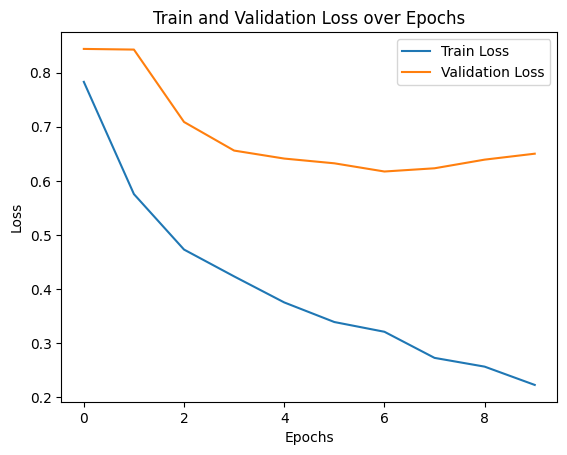

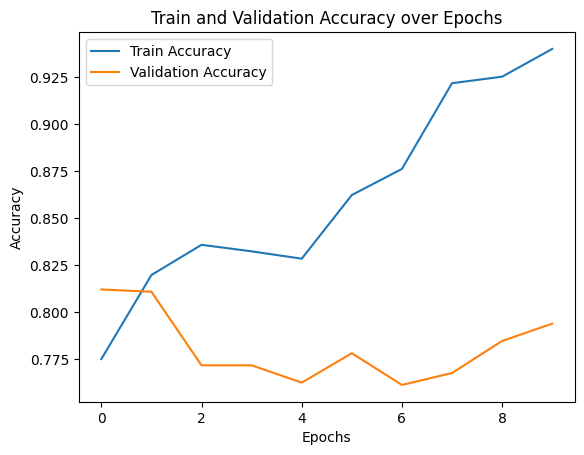

<ipython-input-29-c27cd2d063ac>:204: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_resnet18_model.pth'))
100%|██████████| 6/6 [00:01<0

Test accuracy: 0.7422, Test ROC-AUC: 0.7453


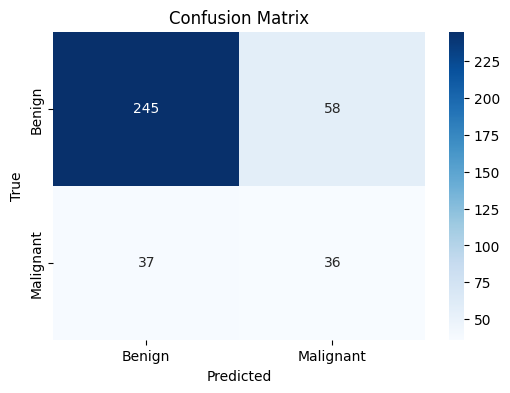

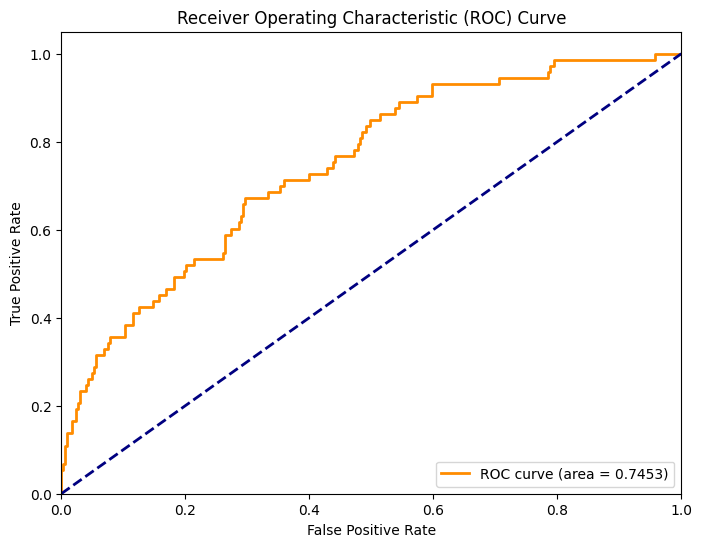

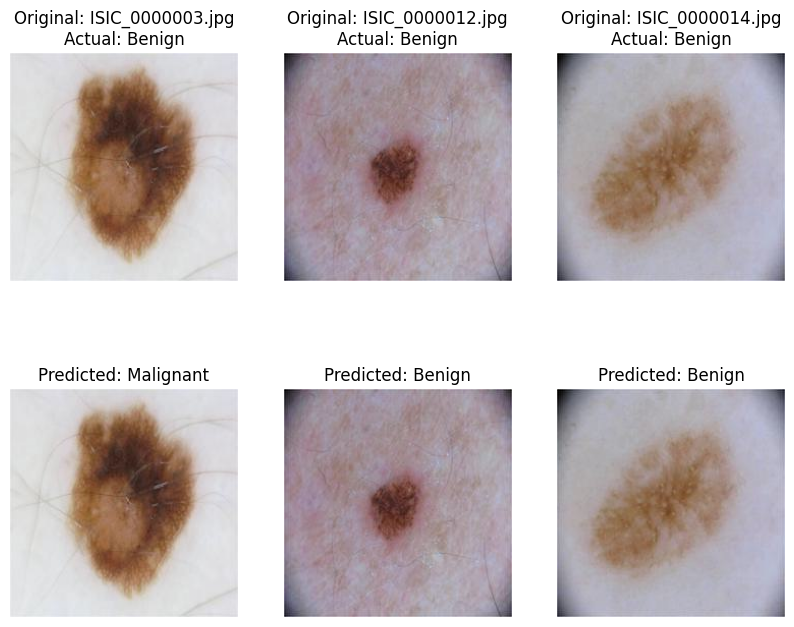

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Subset
from torchvision import datasets, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import os
import torchvision

# Data Preprocessing
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()  # No normalization or augmentation
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()  # No normalization or augmentation
])

# Construct datasets
train_dataset = datasets.ImageFolder("/content/drive/MyDrive/parmesh dissertation folder/train and test data set/Preprocessed_Data/train", transform=train_transform)
test_dataset = datasets.ImageFolder("/content/drive/MyDrive/parmesh dissertation folder/train and test data set/Preprocessed_Data/test", transform=test_transform)

# Train-validation split
train_ratio = 0.8
train_size = int(train_ratio * len(train_dataset))
val_size = len(train_dataset) - train_size

# Splitting dataset indices
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

print(f'Original train set has {len(train_dataset)} samples')
print(f'Train set has {len(train_subset)} samples')
print(f'Validation set has {len(val_subset)} samples')

# Class counts in the dataset
class_counts = [719, 176]  # Benign and Malignant counts in the training set
total_samples = sum(class_counts)

# Calculate class weights (inverse of class frequencies)
class_weights = [total_samples/class_count for class_count in class_counts]
class_weights = torch.FloatTensor(class_weights).to('cuda')

# Weighted loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Batch size
batch_size = 64

# Data loaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
valid_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model: Use pre-trained ResNet18
model = torchvision.models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # Adjust for binary classification
model = model.to('cuda')

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Training setup
n_epochs = 10
best_epoch_results = {}  # Dictionary to store the best epoch metrics

# Lists to store training/validation losses and accuracies
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

# Training and evaluation function
def train_and_evaluate_model(model, criterion, optimizer, train_loader, valid_loader, n_epochs=10):
    best_f1_score = 0
    best_roc_auc = 0
    best_epoch_metrics = {}

    for epoch in range(n_epochs):
        # Training phase
        model.train()
        train_loss = []
        train_accs = []

        for batch in tqdm(train_loader):
            imgs, labels = batch
            imgs, labels = imgs.to('cuda'), labels.to('cuda')

            optimizer.zero_grad()
            logits = model(imgs)
            loss = criterion(logits, labels)  # Use weighted loss
            loss.backward()
            optimizer.step()

            acc = (logits.argmax(dim=-1) == labels).float().mean()
            train_loss.append(loss.item())
            train_accs.append(acc.item())

        train_loss = sum(train_loss) / len(train_loss)
        train_acc = sum(train_accs) / len(train_accs)
        train_loss_epochs.append(train_loss)
        train_acc_epochs.append(train_acc)

        # Validation phase
        model.eval()
        valid_loss = []
        valid_accs = []
        y_true, y_pred = [], []
        y_scores = []

        with torch.no_grad():
            for batch in tqdm(valid_loader):
                imgs, labels = batch
                imgs, labels = imgs.to('cuda'), labels.to('cuda')
                logits = model(imgs)
                loss = criterion(logits, labels)

                acc = (logits.argmax(dim=-1) == labels).float().mean()
                valid_loss.append(loss.item())
                valid_accs.append(acc.item())

                y_true.extend(labels.cpu().numpy())
                y_pred.extend(logits.argmax(dim=-1).cpu().numpy())

                probs = logits.softmax(dim=1)[:, 1]  # Probability scores for the positive class (Malignant)
                y_scores.extend(probs.cpu().numpy())

        valid_loss = sum(valid_loss) / len(valid_loss)
        valid_acc = sum(valid_accs) / len(valid_accs)
        valid_loss_epochs.append(valid_loss)
        valid_acc_epochs.append(valid_acc)

        # Calculate precision, recall, F1-score, and ROC-AUC
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_true, y_scores)

        # Save the best model based on F1 and ROC-AUC
        if f1 > best_f1_score and roc_auc > best_roc_auc:
            best_f1_score = f1
            best_roc_auc = roc_auc
            best_epoch_metrics = {
                'epoch': epoch + 1,  # Storing as 1-indexed epoch
                'f1_score': f1,
                'roc_auc': roc_auc,
                'precision': precision,
                'recall': recall,
                'valid_acc': valid_acc,
                'valid_loss': valid_loss
            }
            # Save the model
            torch.save(model.state_dict(), 'best_resnet18_model.pth')  # Save the best model checkpoint

        print(f"[Epoch {epoch+1}/{n_epochs}] "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}, "
              f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, "
              f"ROC-AUC: {roc_auc:.4f}")

    # Store the best epoch results
    best_epoch_results['ResNet18'] = best_epoch_metrics

# Train the ResNet18 model
train_and_evaluate_model(model, criterion, optimizer, train_loader, valid_loader, n_epochs=10)

# After training, print the best epoch results
print("\nBest Epoch Results for ResNet18:")
metrics = best_epoch_results['ResNet18']
print(f"Best Epoch: {metrics['epoch']}")
print(f"F1 Score: {metrics['f1_score']:.4f}")
print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"Validation Accuracy: {metrics['valid_acc']:.4f}")
print(f"Validation Loss: {metrics['valid_loss']:.4f}")

# Plotting loss
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs')
plt.legend()
plt.show()

# Plotting accuracy
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Load the best model for testing
model.load_state_dict(torch.load('best_resnet18_model.pth'))
model.eval()

# Testing phase
test_accs = []
all_preds = []
all_labels = []
all_scores = []  # To store probability scores

for batch in tqdm(test_loader):
    imgs, labels = batch
    imgs, labels = imgs.to('cuda'), labels.to('cuda')

    with torch.no_grad():
        logits = model(imgs)

    acc = (logits.argmax(dim=-1) == labels).float().mean()
    test_accs.append(acc.item())

    preds = logits.argmax(dim=-1)
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

    probs = logits.softmax(dim=1)[:, 1]  # Probability scores for the positive class (Malignant)
    all_scores.extend(probs.cpu().numpy())

test_acc = sum(test_accs) / len(test_accs)
test_roc_auc = roc_auc_score(all_labels, all_scores)
print(f'Test accuracy: {test_acc:.4f}, Test ROC-AUC: {test_roc_auc:.4f}')

# Confusion matrix
class_names = ['Benign', 'Malignant']
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Function to display and predict images with original filenames
def display_and_predict_images_with_filenames(data_loader, model, class_names, device, num_samples=3):
    model.eval()
    images_so_far = 0
    plt.figure(figsize=(10, 8))

    with torch.no_grad():
        for imgs, labels in data_loader:  # We now use labels to match filenames with ground truth
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)

            # Iterate through the batch
            for i in range(imgs.size()[0]):
                images_so_far += 1

                # Get the original filename
                path, _ = data_loader.dataset.samples[i]
                filename = os.path.basename(path)

                # Convert label index to class name
                actual_class = class_names[labels[i].item()]
                predicted_class = class_names[preds[i].item()]

                # Display the image
                ax = plt.subplot(2, num_samples, images_so_far)
                ax.axis('off')
                img = imgs[i].cpu().numpy().transpose((1, 2, 0))
                img = np.clip(img, 0, 1)

                plt.imshow(img)
                ax.set_title(f'Original: {filename}\nActual: {actual_class}')

                # Display the prediction
                ax = plt.subplot(2, num_samples, images_so_far + num_samples)
                ax.axis('off')
                plt.imshow(img)
                ax.set_title(f'Predicted: {predicted_class}')

                if images_so_far == num_samples:
                    plt.show()
                    return

# Example usage with your test data
display_and_predict_images_with_filenames(test_loader, model, class_names, 'cuda', num_samples=3)



# vgg 16 latest

Original train set has 895 samples
Train set has 716 samples
Validation set has 179 samples


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 3/3 [00:01<00:00,  1.97it/s]


[Epoch 1/10] Train Loss: 0.7046, Train Acc: 0.5378, Valid Loss: 0.6657, Valid Acc: 0.6753, Precision: 0.7099, Recall: 0.6760, F1: 0.6903, ROC-AUC: 0.6505


100%|██████████| 3/3 [00:01<00:00,  1.96it/s]


[Epoch 2/10] Train Loss: 0.6422, Train Acc: 0.6549, Valid Loss: 0.6342, Valid Acc: 0.6767, Precision: 0.7321, Recall: 0.6760, F1: 0.6966, ROC-AUC: 0.7005


100%|██████████| 3/3 [00:01<00:00,  1.87it/s]


[Epoch 3/10] Train Loss: 0.5841, Train Acc: 0.7036, Valid Loss: 0.6218, Valid Acc: 0.7092, Precision: 0.7489, Recall: 0.7151, F1: 0.7285, ROC-AUC: 0.7163


100%|██████████| 3/3 [00:01<00:00,  1.98it/s]


[Epoch 4/10] Train Loss: 0.5663, Train Acc: 0.6871, Valid Loss: 0.6021, Valid Acc: 0.7132, Precision: 0.7518, Recall: 0.7095, F1: 0.7254, ROC-AUC: 0.7368


100%|██████████| 3/3 [00:01<00:00,  1.98it/s]


[Epoch 5/10] Train Loss: 0.4971, Train Acc: 0.7661, Valid Loss: 0.6285, Valid Acc: 0.7706, Precision: 0.7611, Recall: 0.7654, F1: 0.7631, ROC-AUC: 0.7436


100%|██████████| 3/3 [00:01<00:00,  2.00it/s]


[Epoch 6/10] Train Loss: 0.4593, Train Acc: 0.8151, Valid Loss: 0.5874, Valid Acc: 0.7418, Precision: 0.7879, Recall: 0.7430, F1: 0.7583, ROC-AUC: 0.7577


100%|██████████| 3/3 [00:01<00:00,  1.97it/s]


[Epoch 7/10] Train Loss: 0.4200, Train Acc: 0.8251, Valid Loss: 0.6262, Valid Acc: 0.7849, Precision: 0.7926, Recall: 0.7821, F1: 0.7867, ROC-AUC: 0.7549


100%|██████████| 3/3 [00:01<00:00,  1.92it/s]


[Epoch 8/10] Train Loss: 0.3391, Train Acc: 0.8494, Valid Loss: 0.7121, Valid Acc: 0.8084, Precision: 0.7992, Recall: 0.8045, F1: 0.8016, ROC-AUC: 0.7440


100%|██████████| 3/3 [00:01<00:00,  1.83it/s]


[Epoch 9/10] Train Loss: 0.3126, Train Acc: 0.8728, Valid Loss: 0.6282, Valid Acc: 0.7575, Precision: 0.7903, Recall: 0.7598, F1: 0.7711, ROC-AUC: 0.7698


100%|██████████| 3/3 [00:01<00:00,  1.88it/s]


[Epoch 10/10] Train Loss: 0.2485, Train Acc: 0.8993, Valid Loss: 0.7856, Valid Acc: 0.8111, Precision: 0.7960, Recall: 0.8045, F1: 0.7995, ROC-AUC: 0.7537

Best Epoch Results for VGG16:
Best Epoch: 7
F1 Score: 0.7867
ROC-AUC: 0.7549
Precision: 0.7926
Recall: 0.7821
Validation Accuracy: 0.7849
Validation Loss: 0.6262


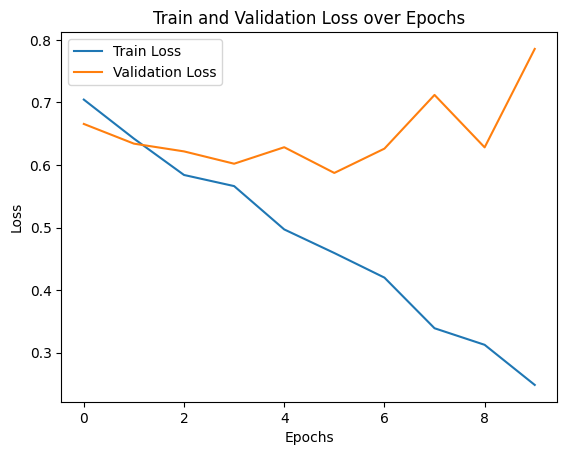

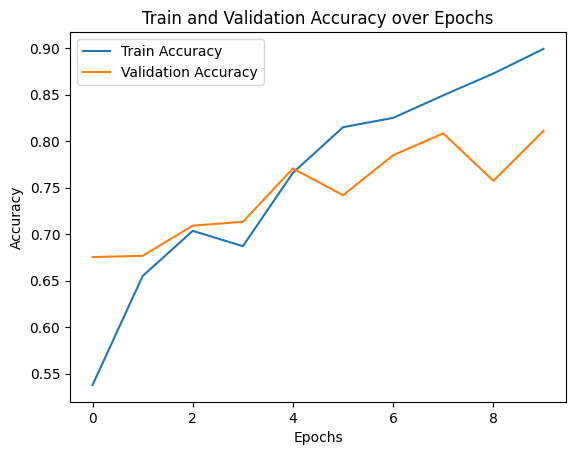

<ipython-input-28-0d0c272c6795>:204: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_vgg16_model.pth'))
100%|██████████| 6/6 [00:03<00:0

Test accuracy: 0.7478, Test ROC-AUC: 0.7831


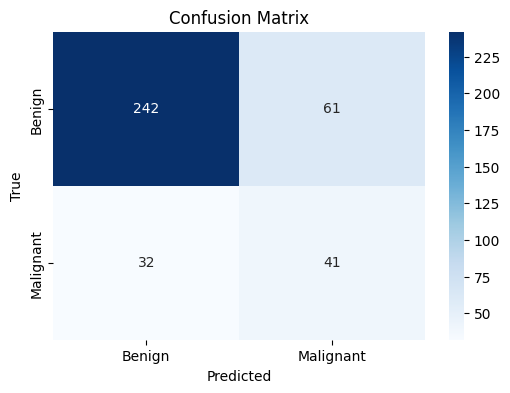

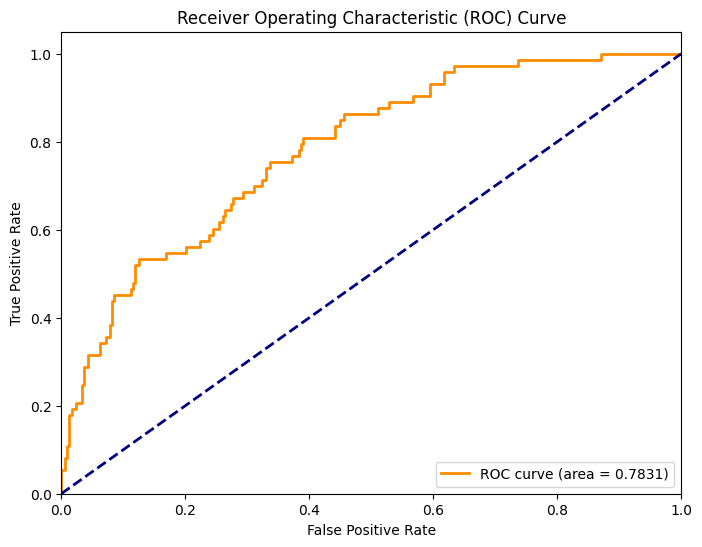

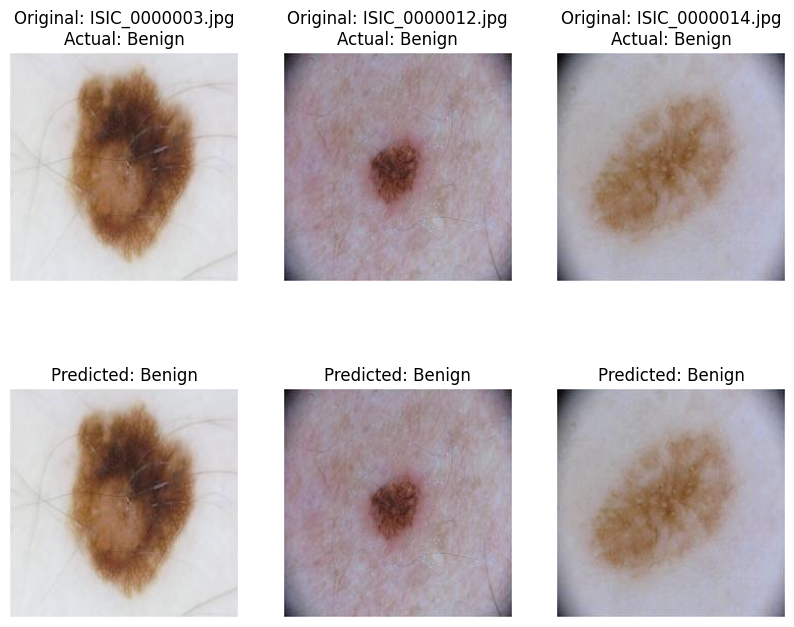

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Subset
from torchvision import datasets, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import os
import torchvision

# Data Preprocessing
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()  # No normalization or augmentation
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()  # No normalization or augmentation
])

# Construct datasets
train_dataset = datasets.ImageFolder("/content/drive/MyDrive/parmesh dissertation folder/train and test data set/Preprocessed_Data/train", transform=train_transform)
test_dataset = datasets.ImageFolder("/content/drive/MyDrive/parmesh dissertation folder/train and test data set/Preprocessed_Data/test", transform=test_transform)

# Train-validation split
train_ratio = 0.8
train_size = int(train_ratio * len(train_dataset))
val_size = len(train_dataset) - train_size

# Splitting dataset indices
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

print(f'Original train set has {len(train_dataset)} samples')
print(f'Train set has {len(train_subset)} samples')
print(f'Validation set has {len(val_subset)} samples')

# Class counts in the dataset
class_counts = [719, 176]  # Benign and Malignant counts in the training set
total_samples = sum(class_counts)

# Calculate class weights (inverse of class frequencies)
class_weights = [total_samples/class_count for class_count in class_counts]
class_weights = torch.FloatTensor(class_weights).to('cuda')

# Weighted loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Batch size
batch_size = 64

# Data loaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
valid_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model: Use pre-trained VGG16
model = torchvision.models.vgg16(pretrained=True)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, 2)  # Adjust for binary classification
model = model.to('cuda')

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Training setup
n_epochs = 10
best_epoch_results = {}  # Dictionary to store the best epoch metrics

# Lists to store training/validation losses and accuracies
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

# Training and evaluation function
def train_and_evaluate_model(model, criterion, optimizer, train_loader, valid_loader, n_epochs=10):
    best_f1_score = 0
    best_roc_auc = 0
    best_epoch_metrics = {}

    for epoch in range(n_epochs):
        # Training phase
        model.train()
        train_loss = []
        train_accs = []

        for batch in tqdm(train_loader):
            imgs, labels = batch
            imgs, labels = imgs.to('cuda'), labels.to('cuda')

            optimizer.zero_grad()
            logits = model(imgs)
            loss = criterion(logits, labels)  # Use weighted loss
            loss.backward()
            optimizer.step()

            acc = (logits.argmax(dim=-1) == labels).float().mean()
            train_loss.append(loss.item())
            train_accs.append(acc.item())

        train_loss = sum(train_loss) / len(train_loss)
        train_acc = sum(train_accs) / len(train_accs)
        train_loss_epochs.append(train_loss)
        train_acc_epochs.append(train_acc)

        # Validation phase
        model.eval()
        valid_loss = []
        valid_accs = []
        y_true, y_pred = [], []
        y_scores = []

        with torch.no_grad():
            for batch in tqdm(valid_loader):
                imgs, labels = batch
                imgs, labels = imgs.to('cuda'), labels.to('cuda')
                logits = model(imgs)
                loss = criterion(logits, labels)

                acc = (logits.argmax(dim=-1) == labels).float().mean()
                valid_loss.append(loss.item())
                valid_accs.append(acc.item())

                y_true.extend(labels.cpu().numpy())
                y_pred.extend(logits.argmax(dim=-1).cpu().numpy())

                probs = logits.softmax(dim=1)[:, 1]  # Probability scores for the positive class (Malignant)
                y_scores.extend(probs.cpu().numpy())

        valid_loss = sum(valid_loss) / len(valid_loss)
        valid_acc = sum(valid_accs) / len(valid_accs)
        valid_loss_epochs.append(valid_loss)
        valid_acc_epochs.append(valid_acc)

        # Calculate precision, recall, F1-score, and ROC-AUC
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_true, y_scores)

        # Save the best model based on F1 and ROC-AUC
        if f1 > best_f1_score and roc_auc > best_roc_auc:
            best_f1_score = f1
            best_roc_auc = roc_auc
            best_epoch_metrics = {
                'epoch': epoch + 1,  # Storing as 1-indexed epoch
                'f1_score': f1,
                'roc_auc': roc_auc,
                'precision': precision,
                'recall': recall,
                'valid_acc': valid_acc,
                'valid_loss': valid_loss
            }
            # Save the model
            torch.save(model.state_dict(), 'best_vgg16_model.pth')  # Save the best model checkpoint

        print(f"[Epoch {epoch+1}/{n_epochs}] "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}, "
              f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, "
              f"ROC-AUC: {roc_auc:.4f}")

    # Store the best epoch results
    best_epoch_results['VGG16'] = best_epoch_metrics

# Train the VGG16 model
train_and_evaluate_model(model, criterion, optimizer, train_loader, valid_loader, n_epochs=10)

# After training, print the best epoch results
print("\nBest Epoch Results for VGG16:")
metrics = best_epoch_results['VGG16']
print(f"Best Epoch: {metrics['epoch']}")
print(f"F1 Score: {metrics['f1_score']:.4f}")
print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"Validation Accuracy: {metrics['valid_acc']:.4f}")
print(f"Validation Loss: {metrics['valid_loss']:.4f}")

# Plotting loss
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs')
plt.legend()
plt.show()

# Plotting accuracy
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Load the best model for testing
model.load_state_dict(torch.load('best_vgg16_model.pth'))
model.eval()

# Testing phase
test_accs = []
all_preds = []
all_labels = []
all_scores = []  # To store probability scores

for batch in tqdm(test_loader):
    imgs, labels = batch
    imgs, labels = imgs.to('cuda'), labels.to('cuda')

    with torch.no_grad():
        logits = model(imgs)

    acc = (logits.argmax(dim=-1) == labels).float().mean()
    test_accs.append(acc.item())

    preds = logits.argmax(dim=-1)
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

    probs = logits.softmax(dim=1)[:, 1]  # Probability scores for the positive class (Malignant)
    all_scores.extend(probs.cpu().numpy())

test_acc = sum(test_accs) / len(test_accs)
test_roc_auc = roc_auc_score(all_labels, all_scores)
print(f'Test accuracy: {test_acc:.4f}, Test ROC-AUC: {test_roc_auc:.4f}')

# Confusion matrix
class_names = ['Benign', 'Malignant']
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Function to display and predict images with original filenames
def display_and_predict_images_with_filenames(data_loader, model, class_names, device, num_samples=3):
    model.eval()
    images_so_far = 0
    plt.figure(figsize=(10, 8))

    with torch.no_grad():
        for imgs, labels in data_loader:  # We now use labels to match filenames with ground truth
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)

            # Iterate through the batch
            for i in range(imgs.size()[0]):
                images_so_far += 1

                # Get the original filename
                path, _ = data_loader.dataset.samples[i]
                filename = os.path.basename(path)

                # Convert label index to class name
                actual_class = class_names[labels[i].item()]
                predicted_class = class_names[preds[i].item()]

                # Display the image
                ax = plt.subplot(2, num_samples, images_so_far)
                ax.axis('off')
                img = imgs[i].cpu().numpy().transpose((1, 2, 0))
                img = np.clip(img, 0, 1)

                plt.imshow(img)
                ax.set_title(f'Original: {filename}\nActual: {actual_class}')

                # Display the prediction
                ax = plt.subplot(2, num_samples, images_so_far + num_samples)
                ax.axis('off')
                plt.imshow(img)
                ax.set_title(f'Predicted: {predicted_class}')

                if images_so_far == num_samples:
                    plt.show()
                    return

# Example usage with your test data
display_and_predict_images_with_filenames(test_loader, model, class_names, 'cuda', num_samples=3)



# inception v3 latest

Original train set has 895 samples
Train set has 716 samples
Validation set has 179 samples


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 3/3 [00:01<00:00,  1.78it/s]


[Epoch 1/10] Train Loss: 0.9948, Train Acc: 0.3759, Valid Loss: 0.6720, Valid Acc: 0.5450, Precision: 0.7835, Recall: 0.5419, F1: 0.5840, ROC-AUC: 0.6768


100%|██████████| 3/3 [00:01<00:00,  1.82it/s]


[Epoch 2/10] Train Loss: 0.8824, Train Acc: 0.5000, Valid Loss: 0.6469, Valid Acc: 0.6141, Precision: 0.7857, Recall: 0.6145, F1: 0.6543, ROC-AUC: 0.7204


100%|██████████| 3/3 [00:01<00:00,  1.85it/s]


[Epoch 3/10] Train Loss: 0.8210, Train Acc: 0.5938, Valid Loss: 0.6201, Valid Acc: 0.7183, Precision: 0.8091, Recall: 0.7207, F1: 0.7463, ROC-AUC: 0.7712


100%|██████████| 3/3 [00:01<00:00,  1.73it/s]


[Epoch 4/10] Train Loss: 0.7447, Train Acc: 0.6688, Valid Loss: 0.6134, Valid Acc: 0.7302, Precision: 0.8174, Recall: 0.7263, F1: 0.7518, ROC-AUC: 0.7560


100%|██████████| 3/3 [00:01<00:00,  1.52it/s]


[Epoch 5/10] Train Loss: 0.6743, Train Acc: 0.7517, Valid Loss: 0.6079, Valid Acc: 0.7328, Precision: 0.8045, Recall: 0.7263, F1: 0.7502, ROC-AUC: 0.7440


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


[Epoch 6/10] Train Loss: 0.6433, Train Acc: 0.7600, Valid Loss: 0.6063, Valid Acc: 0.7326, Precision: 0.8146, Recall: 0.7374, F1: 0.7604, ROC-AUC: 0.7540


100%|██████████| 3/3 [00:01<00:00,  1.79it/s]


[Epoch 7/10] Train Loss: 0.5746, Train Acc: 0.8121, Valid Loss: 0.6006, Valid Acc: 0.7327, Precision: 0.8192, Recall: 0.7318, F1: 0.7565, ROC-AUC: 0.7540


100%|██████████| 3/3 [00:01<00:00,  1.77it/s]


[Epoch 8/10] Train Loss: 0.5453, Train Acc: 0.8251, Valid Loss: 0.5982, Valid Acc: 0.7353, Precision: 0.8083, Recall: 0.7374, F1: 0.7595, ROC-AUC: 0.7579


100%|██████████| 3/3 [00:01<00:00,  1.79it/s]


[Epoch 9/10] Train Loss: 0.4818, Train Acc: 0.8715, Valid Loss: 0.5919, Valid Acc: 0.7354, Precision: 0.7883, Recall: 0.7318, F1: 0.7516, ROC-AUC: 0.7629


100%|██████████| 3/3 [00:01<00:00,  1.76it/s]


[Epoch 10/10] Train Loss: 0.4215, Train Acc: 0.9010, Valid Loss: 0.5987, Valid Acc: 0.7418, Precision: 0.7813, Recall: 0.7430, F1: 0.7579, ROC-AUC: 0.7603

Best Epoch Results for InceptionV3:
Best Epoch: 3
F1 Score: 0.7463
ROC-AUC: 0.7712
Precision: 0.8091
Recall: 0.7207
Validation Accuracy: 0.7183
Validation Loss: 0.6201


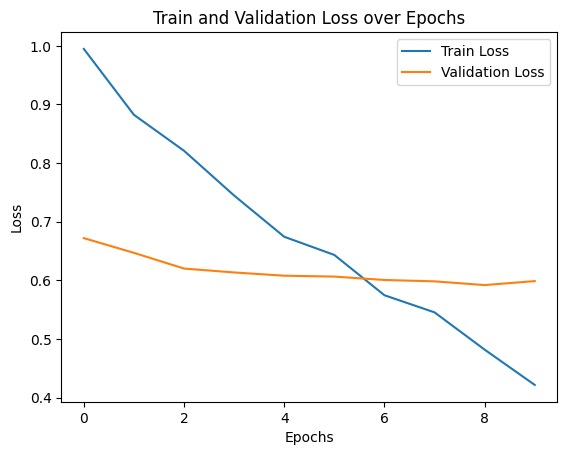

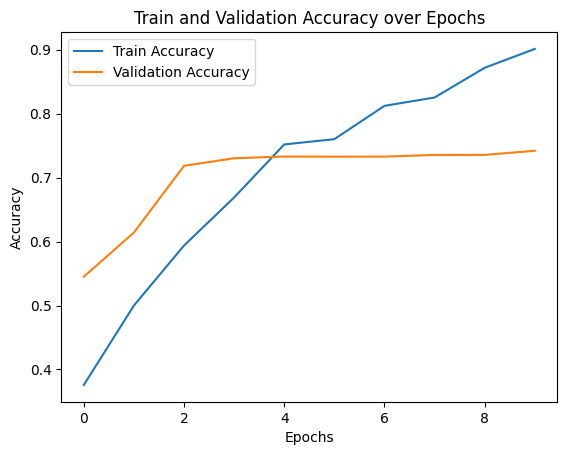

<ipython-input-27-cca55f421e63>:210: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_inceptionv3_model.pth'))
100%|██████████| 6/6 [00:0

Test accuracy: 0.6462, Test ROC-AUC: 0.6991


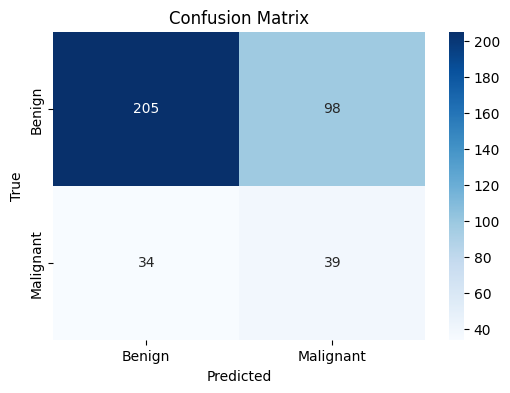

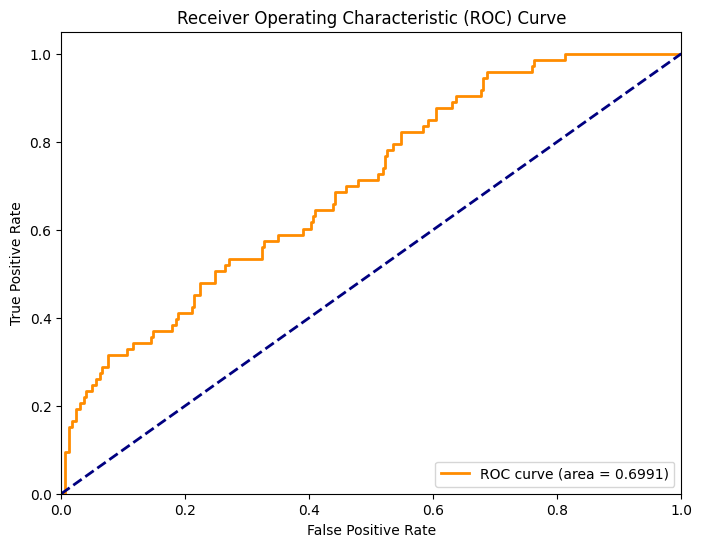

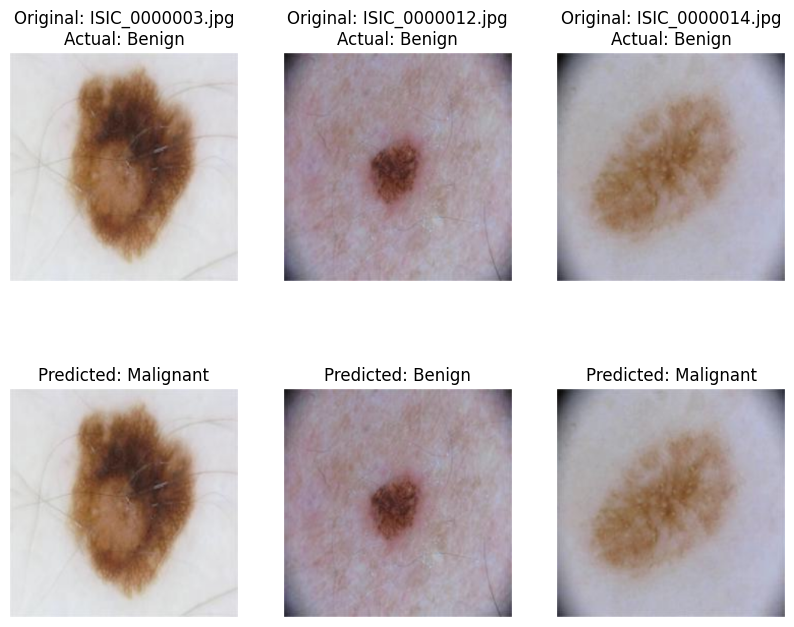

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Subset
from torchvision import datasets, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import os
import torchvision

# Data Preprocessing
train_transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Inception v3 expects 299x299 images
    transforms.ToTensor()  # No normalization or augmentation
])

test_transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor()  # No normalization or augmentation
])

# Construct datasets
train_dataset = datasets.ImageFolder("/content/drive/MyDrive/parmesh dissertation folder/train and test data set/Preprocessed_Data/train", transform=train_transform)
test_dataset = datasets.ImageFolder("/content/drive/MyDrive/parmesh dissertation folder/train and test data set/Preprocessed_Data/test", transform=test_transform)

# Train-validation split
train_ratio = 0.8
train_size = int(train_ratio * len(train_dataset))
val_size = len(train_dataset) - train_size

# Splitting dataset indices
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

print(f'Original train set has {len(train_dataset)} samples')
print(f'Train set has {len(train_subset)} samples')
print(f'Validation set has {len(val_subset)} samples')

# Class counts in the dataset
class_counts = [719, 176]  # Benign and Malignant counts in the training set
total_samples = sum(class_counts)

# Calculate class weights (inverse of class frequencies)
class_weights = [total_samples/class_count for class_count in class_counts]
class_weights = torch.FloatTensor(class_weights).to('cuda')

# Weighted loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Batch size
batch_size = 64

# Data loaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
valid_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model: Use pre-trained InceptionV3
model = torchvision.models.inception_v3(pretrained=True)
model.aux_logits = True  # Enable auxiliary outputs (specific to Inception)
model.fc = nn.Linear(model.fc.in_features, 2)  # Adjust for binary classification
model.AuxLogits.fc = nn.Linear(model.AuxLogits.fc.in_features, 2)  # Adjust auxiliary output
model = model.to('cuda')

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Training setup
n_epochs = 10
best_epoch_results = {}  # Dictionary to store the best epoch metrics

# Lists to store training/validation losses and accuracies
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

# Training and evaluation function
def train_and_evaluate_model(model, criterion, optimizer, train_loader, valid_loader, n_epochs=10):
    best_f1_score = 0
    best_roc_auc = 0
    best_epoch_metrics = {}

    for epoch in range(n_epochs):
        # Training phase
        model.train()
        train_loss = []
        train_accs = []

        for batch in tqdm(train_loader):
            imgs, labels = batch
            imgs, labels = imgs.to('cuda'), labels.to('cuda')

            optimizer.zero_grad()

            # Inception v3 has two outputs, logits and auxiliary_logits
            logits, aux_logits = model(imgs)
            loss1 = criterion(logits, labels)  # Main output loss
            loss2 = criterion(aux_logits, labels)  # Auxiliary output loss
            loss = loss1 + 0.4 * loss2  # Combine with a weight (0.4) on auxiliary loss
            loss.backward()
            optimizer.step()

            acc = (logits.argmax(dim=-1) == labels).float().mean()
            train_loss.append(loss.item())
            train_accs.append(acc.item())

        train_loss = sum(train_loss) / len(train_loss)
        train_acc = sum(train_accs) / len(train_accs)
        train_loss_epochs.append(train_loss)
        train_acc_epochs.append(train_acc)

        # Validation phase
        model.eval()
        valid_loss = []
        valid_accs = []
        y_true, y_pred = [], []
        y_scores = []

        with torch.no_grad():
            for batch in tqdm(valid_loader):
                imgs, labels = batch
                imgs, labels = imgs.to('cuda'), labels.to('cuda')
                logits = model(imgs)  # In evaluation mode, only primary output (logits) is returned
                loss = criterion(logits, labels)

                acc = (logits.argmax(dim=-1) == labels).float().mean()
                valid_loss.append(loss.item())
                valid_accs.append(acc.item())

                y_true.extend(labels.cpu().numpy())
                y_pred.extend(logits.argmax(dim=-1).cpu().numpy())

                probs = logits.softmax(dim=1)[:, 1]  # Probability scores for the positive class (Malignant)
                y_scores.extend(probs.cpu().numpy())

        valid_loss = sum(valid_loss) / len(valid_loss)
        valid_acc = sum(valid_accs) / len(valid_accs)
        valid_loss_epochs.append(valid_loss)
        valid_acc_epochs.append(valid_acc)

        # Calculate precision, recall, F1-score, and ROC-AUC
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_true, y_scores)

        # Save the best model based on F1 and ROC-AUC
        if f1 > best_f1_score and roc_auc > best_roc_auc:
            best_f1_score = f1
            best_roc_auc = roc_auc
            best_epoch_metrics = {
                'epoch': epoch + 1,  # Storing as 1-indexed epoch
                'f1_score': f1,
                'roc_auc': roc_auc,
                'precision': precision,
                'recall': recall,
                'valid_acc': valid_acc,
                'valid_loss': valid_loss
            }
            # Save the model
            torch.save(model.state_dict(), 'best_inceptionv3_model.pth')  # Save the best model checkpoint

        print(f"[Epoch {epoch+1}/{n_epochs}] "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}, "
              f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, "
              f"ROC-AUC: {roc_auc:.4f}")

    # Store the best epoch results
    best_epoch_results['InceptionV3'] = best_epoch_metrics

# Train the InceptionV3 model
train_and_evaluate_model(model, criterion, optimizer, train_loader, valid_loader, n_epochs=10)

# After training, print the best epoch results
print("\nBest Epoch Results for InceptionV3:")
metrics = best_epoch_results['InceptionV3']
print(f"Best Epoch: {metrics['epoch']}")
print(f"F1 Score: {metrics['f1_score']:.4f}")
print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"Validation Accuracy: {metrics['valid_acc']:.4f}")
print(f"Validation Loss: {metrics['valid_loss']:.4f}")

# Plotting loss
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs')
plt.legend()
plt.show()

# Plotting accuracy
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Load the best model for testing
model.load_state_dict(torch.load('best_inceptionv3_model.pth'))
model.eval()

# Testing phase
test_accs = []
all_preds = []
all_labels = []
all_scores = []  # To store probability scores

for batch in tqdm(test_loader):
    imgs, labels = batch
    imgs, labels = imgs.to('cuda'), labels.to('cuda')

    with torch.no_grad():
        logits = model(imgs)  # In evaluation mode, only primary output (logits) is returned

    acc = (logits.argmax(dim=-1) == labels).float().mean()
    test_accs.append(acc.item())

    preds = logits.argmax(dim=-1)
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

    probs = logits.softmax(dim=1)[:, 1]  # Probability scores for the positive class (Malignant)
    all_scores.extend(probs.cpu().numpy())

test_acc = sum(test_accs) / len(test_accs)
test_roc_auc = roc_auc_score(all_labels, all_scores)
print(f'Test accuracy: {test_acc:.4f}, Test ROC-AUC: {test_roc_auc:.4f}')

# Confusion matrix
class_names = ['Benign', 'Malignant']
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Function to display and predict images with original filenames
def display_and_predict_images_with_filenames(data_loader, model, class_names, device, num_samples=3):
    model.eval()
    images_so_far = 0
    plt.figure(figsize=(10, 8))

    with torch.no_grad():
        for imgs, labels in data_loader:  # We now use labels to match filenames with ground truth
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)

            # Iterate through the batch
            for i in range(imgs.size()[0]):
                images_so_far += 1

                # Get the original filename
                path, _ = data_loader.dataset.samples[i]
                filename = os.path.basename(path)

                # Convert label index to class name
                actual_class = class_names[labels[i].item()]
                predicted_class = class_names[preds[i].item()]

                # Display the image
                ax = plt.subplot(2, num_samples, images_so_far)
                ax.axis('off')
                img = imgs[i].cpu().numpy().transpose((1, 2, 0))
                img = np.clip(img, 0, 1)

                plt.imshow(img)
                ax.set_title(f'Original: {filename}\nActual: {actual_class}')

                # Display the prediction
                ax = plt.subplot(2, num_samples, images_so_far + num_samples)
                ax.axis('off')
                plt.imshow(img)
                ax.set_title(f'Predicted: {predicted_class}')

                if images_so_far == num_samples:
                    plt.show()
                    return

# Example usage with your test data
display_and_predict_images_with_filenames(test_loader, model, class_names, 'cuda', num_samples=3)




# resnet50 latest

Original train set has 895 samples
Train set has 716 samples
Validation set has 179 samples


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


[Epoch 1/10] Train Loss: 0.6663, Train Acc: 0.6367, Valid Loss: 0.6640, Valid Acc: 0.7392, Precision: 0.7642, Recall: 0.7430, F1: 0.7522, ROC-AUC: 0.6614


100%|██████████| 3/3 [00:01<00:00,  2.45it/s]


[Epoch 2/10] Train Loss: 0.5527, Train Acc: 0.7018, Valid Loss: 0.6414, Valid Acc: 0.7875, Precision: 0.7344, Recall: 0.7877, F1: 0.7429, ROC-AUC: 0.7696


100%|██████████| 3/3 [00:01<00:00,  2.55it/s]


[Epoch 3/10] Train Loss: 0.4806, Train Acc: 0.7704, Valid Loss: 0.6026, Valid Acc: 0.8148, Precision: 0.7948, Recall: 0.8156, F1: 0.7993, ROC-AUC: 0.7966


100%|██████████| 3/3 [00:01<00:00,  2.51it/s]


[Epoch 4/10] Train Loss: 0.4327, Train Acc: 0.8030, Valid Loss: 0.5603, Valid Acc: 0.8058, Precision: 0.8025, Recall: 0.8045, F1: 0.8034, ROC-AUC: 0.8209


100%|██████████| 3/3 [00:01<00:00,  2.50it/s]


[Epoch 5/10] Train Loss: 0.3423, Train Acc: 0.8798, Valid Loss: 0.5327, Valid Acc: 0.8084, Precision: 0.8025, Recall: 0.8045, F1: 0.8034, ROC-AUC: 0.8339


100%|██████████| 3/3 [00:01<00:00,  2.19it/s]


[Epoch 6/10] Train Loss: 0.3036, Train Acc: 0.9297, Valid Loss: 0.5310, Valid Acc: 0.8240, Precision: 0.8110, Recall: 0.8212, F1: 0.8149, ROC-AUC: 0.8485


100%|██████████| 3/3 [00:01<00:00,  2.44it/s]


[Epoch 7/10] Train Loss: 0.2305, Train Acc: 0.9444, Valid Loss: 0.4965, Valid Acc: 0.8434, Precision: 0.8508, Recall: 0.8492, F1: 0.8499, ROC-AUC: 0.8588


100%|██████████| 3/3 [00:01<00:00,  2.51it/s]


[Epoch 8/10] Train Loss: 0.2050, Train Acc: 0.9601, Valid Loss: 0.5093, Valid Acc: 0.8461, Precision: 0.8476, Recall: 0.8492, F1: 0.8484, ROC-AUC: 0.8580


100%|██████████| 3/3 [00:01<00:00,  2.55it/s]


[Epoch 9/10] Train Loss: 0.1648, Train Acc: 0.9818, Valid Loss: 0.5063, Valid Acc: 0.8579, Precision: 0.8472, Recall: 0.8547, F1: 0.8496, ROC-AUC: 0.8652


100%|██████████| 3/3 [00:01<00:00,  2.51it/s]


[Epoch 10/10] Train Loss: 0.1201, Train Acc: 0.9878, Valid Loss: 0.4846, Valid Acc: 0.8593, Precision: 0.8493, Recall: 0.8547, F1: 0.8515, ROC-AUC: 0.8638

Best Epoch Results for ResNet50:
Best Epoch: 10
F1 Score: 0.8515
ROC-AUC: 0.8638
Precision: 0.8493
Recall: 0.8547
Validation Accuracy: 0.8593
Validation Loss: 0.4846


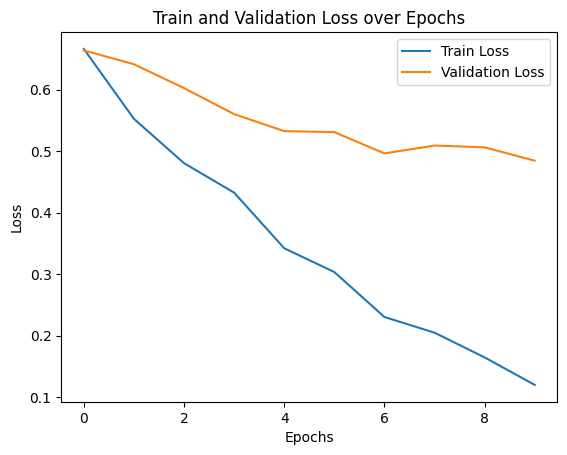

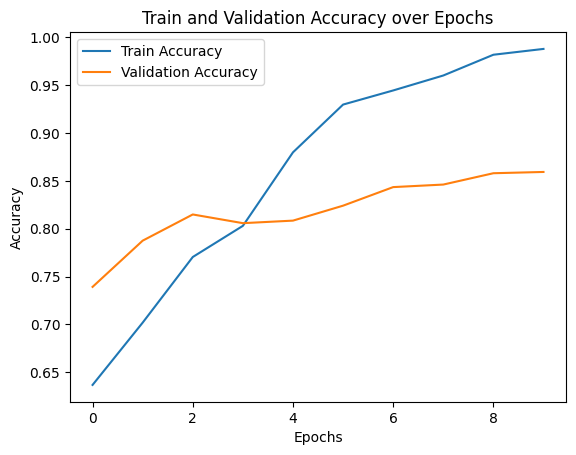

<ipython-input-43-ae05b1236b0f>:204: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_resnet50_model.pth'))
100%|██████████| 6/6 [00:02<0

Test accuracy: 0.7731, Test ROC-AUC: 0.7536


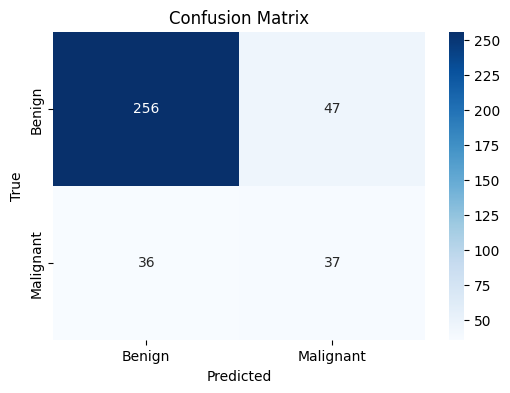

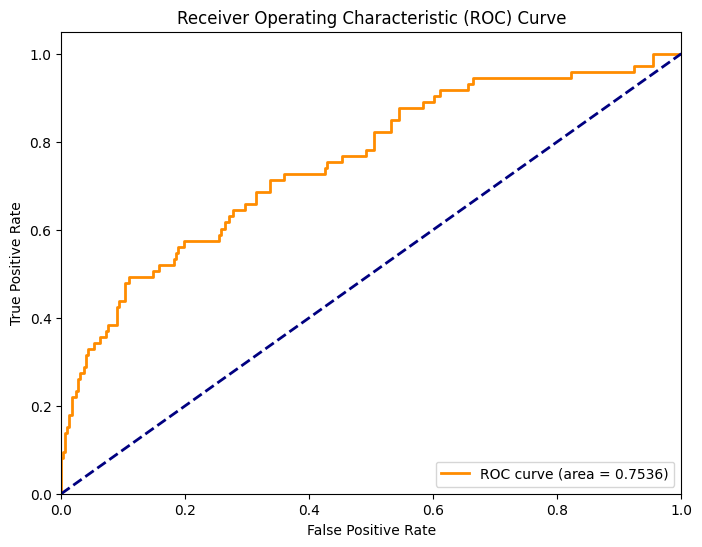

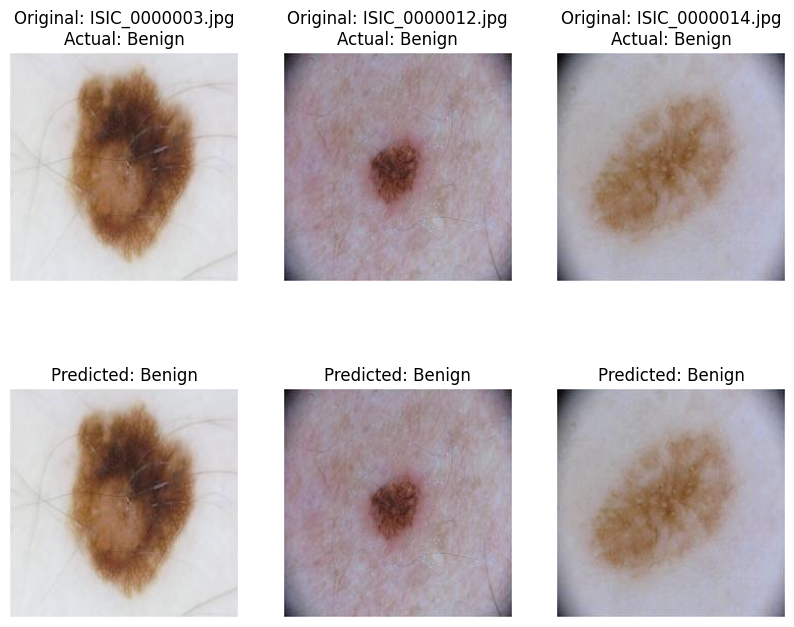

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Subset
from torchvision import datasets, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import os
import torchvision

# Data Preprocessing
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()  # No normalization or augmentation
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()  # No normalization or augmentation
])

# Construct datasets
train_dataset = datasets.ImageFolder("/content/drive/MyDrive/parmesh dissertation folder/train and test data set/Preprocessed_Data/train", transform=train_transform)
test_dataset = datasets.ImageFolder("/content/drive/MyDrive/parmesh dissertation folder/train and test data set/Preprocessed_Data/test", transform=test_transform)

# Train-validation split
train_ratio = 0.8
train_size = int(train_ratio * len(train_dataset))
val_size = len(train_dataset) - train_size

# Splitting dataset indices
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

print(f'Original train set has {len(train_dataset)} samples')
print(f'Train set has {len(train_subset)} samples')
print(f'Validation set has {len(val_subset)} samples')

# Class counts in the dataset
class_counts = [719, 176]  # Benign and Malignant counts in the training set
total_samples = sum(class_counts)

# Calculate class weights (inverse of class frequencies)
class_weights = [total_samples/class_count for class_count in class_counts]
class_weights = torch.FloatTensor(class_weights).to('cuda')

# Weighted loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Batch size
batch_size = 64

# Data loaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
valid_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model: Use pre-trained ResNet50
model = torchvision.models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # Adjust for binary classification
model = model.to('cuda')

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Training setup
n_epochs = 10
best_epoch_results = {}  # Dictionary to store the best epoch metrics

# Lists to store training/validation losses and accuracies
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

# Training and evaluation function
def train_and_evaluate_model(model, criterion, optimizer, train_loader, valid_loader, n_epochs=10):
    best_f1_score = 0
    best_roc_auc = 0
    best_epoch_metrics = {}

    for epoch in range(n_epochs):
        # Training phase
        model.train()
        train_loss = []
        train_accs = []

        for batch in tqdm(train_loader):
            imgs, labels = batch
            imgs, labels = imgs.to('cuda'), labels.to('cuda')

            optimizer.zero_grad()
            logits = model(imgs)
            loss = criterion(logits, labels)  # Use weighted loss
            loss.backward()
            optimizer.step()

            acc = (logits.argmax(dim=-1) == labels).float().mean()
            train_loss.append(loss.item())
            train_accs.append(acc.item())

        train_loss = sum(train_loss) / len(train_loss)
        train_acc = sum(train_accs) / len(train_accs)
        train_loss_epochs.append(train_loss)
        train_acc_epochs.append(train_acc)

        # Validation phase
        model.eval()
        valid_loss = []
        valid_accs = []
        y_true, y_pred = [], []
        y_scores = []

        with torch.no_grad():
            for batch in tqdm(valid_loader):
                imgs, labels = batch
                imgs, labels = imgs.to('cuda'), labels.to('cuda')
                logits = model(imgs)
                loss = criterion(logits, labels)

                acc = (logits.argmax(dim=-1) == labels).float().mean()
                valid_loss.append(loss.item())
                valid_accs.append(acc.item())

                y_true.extend(labels.cpu().numpy())
                y_pred.extend(logits.argmax(dim=-1).cpu().numpy())

                probs = logits.softmax(dim=1)[:, 1]  # Probability scores for the positive class (Malignant)
                y_scores.extend(probs.cpu().numpy())

        valid_loss = sum(valid_loss) / len(valid_loss)
        valid_acc = sum(valid_accs) / len(valid_accs)
        valid_loss_epochs.append(valid_loss)
        valid_acc_epochs.append(valid_acc)

        # Calculate precision, recall, F1-score, and ROC-AUC
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_true, y_scores)

        # Save the best model based on F1 and ROC-AUC
        if f1 > best_f1_score and roc_auc > best_roc_auc:
            best_f1_score = f1
            best_roc_auc = roc_auc
            best_epoch_metrics = {
                'epoch': epoch + 1,  # Storing as 1-indexed epoch
                'f1_score': f1,
                'roc_auc': roc_auc,
                'precision': precision,
                'recall': recall,
                'valid_acc': valid_acc,
                'valid_loss': valid_loss
            }
            # Save the model
            torch.save(model.state_dict(), 'best_resnet50_model.pth')  # Save the best model checkpoint

        print(f"[Epoch {epoch+1}/{n_epochs}] "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}, "
              f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, "
              f"ROC-AUC: {roc_auc:.4f}")

    # Store the best epoch results
    best_epoch_results['ResNet50'] = best_epoch_metrics

# Train the ResNet50 model
train_and_evaluate_model(model, criterion, optimizer, train_loader, valid_loader, n_epochs=10)

# After training, print the best epoch results
print("\nBest Epoch Results for ResNet50:")
metrics = best_epoch_results['ResNet50']
print(f"Best Epoch: {metrics['epoch']}")
print(f"F1 Score: {metrics['f1_score']:.4f}")
print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"Validation Accuracy: {metrics['valid_acc']:.4f}")
print(f"Validation Loss: {metrics['valid_loss']:.4f}")

# Plotting loss
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs')
plt.legend()
plt.show()

# Plotting accuracy
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Load the best model for testing
model.load_state_dict(torch.load('best_resnet50_model.pth'))
model.eval()

# Testing phase
test_accs = []
all_preds = []
all_labels = []
all_scores = []  # To store probability scores

for batch in tqdm(test_loader):
    imgs, labels = batch
    imgs, labels = imgs.to('cuda'), labels.to('cuda')

    with torch.no_grad():
        logits = model(imgs)

    acc = (logits.argmax(dim=-1) == labels).float().mean()
    test_accs.append(acc.item())

    preds = logits.argmax(dim=-1)
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

    probs = logits.softmax(dim=1)[:, 1]  # Probability scores for the positive class (Malignant)
    all_scores.extend(probs.cpu().numpy())

test_acc = sum(test_accs) / len(test_accs)
test_roc_auc = roc_auc_score(all_labels, all_scores)
print(f'Test accuracy: {test_acc:.4f}, Test ROC-AUC: {test_roc_auc:.4f}')

# Confusion matrix
class_names = ['Benign', 'Malignant']
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Function to display and predict images with original filenames
def display_and_predict_images_with_filenames(data_loader, model, class_names, device, num_samples=3):
    model.eval()
    images_so_far = 0
    plt.figure(figsize=(10, 8))

    with torch.no_grad():
        for imgs, labels in data_loader:  # We now use labels to match filenames with ground truth
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)

            # Iterate through the batch
            for i in range(imgs.size()[0]):
                images_so_far += 1

                # Get the original filename
                path, _ = data_loader.dataset.samples[i]
                filename = os.path.basename(path)

                # Convert label index to class name
                actual_class = class_names[labels[i].item()]
                predicted_class = class_names[preds[i].item()]

                # Display the image
                ax = plt.subplot(2, num_samples, images_so_far)
                ax.axis('off')
                img = imgs[i].cpu().numpy().transpose((1, 2, 0))
                img = np.clip(img, 0, 1)

                plt.imshow(img)
                ax.set_title(f'Original: {filename}\nActual: {actual_class}')

                # Display the prediction
                ax = plt.subplot(2, num_samples, images_so_far + num_samples)
                ax.axis('off')
                plt.imshow(img)
                ax.set_title(f'Predicted: {predicted_class}')

                if images_so_far == num_samples:
                    plt.show()
                    return

# Example usage with your test data
display_and_predict_images_with_filenames(test_loader, model, class_names, 'cuda', num_samples=3)


# pickle file for resent50

In [ ]:
import pickle

# Save the model's state_dict to a pickle file
def save_model_pickle(model, filename='resnet50_model.pkl'):
    with open(filename, 'wb') as f:
        pickle.dump(model.state_dict(), f)

# Call this function after training
save_model_pickle(model, 'resnet50_model.pkl')


In [ ]:
# Load the model's state_dict from a pickle file
def load_model_pickle(model, filename='resnet50_model.pkl'):
    with open(filename, 'rb') as f:
        state_dict = pickle.load(f)
        model.load_state_dict(state_dict)

# Create the model architecture (ResNet50)
model = torchvision.models.resnet50(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 2)  # Adjust for binary classification
model = model.to('cuda')

# Load the model state
load_model_pickle(model, 'resnet50_model.pkl')
model.eval()  # Set the model to evaluation mode


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
from PIL import Image

# Define the class names
class_names = ['Benign', 'Malignant']

# Function to preprocess and predict an image
def predict_image(image_path, model, class_names, transform, device='cuda'):
    # Load and preprocess the image
    img = Image.open(image_path).convert('RGB')
    img = transform(img).unsqueeze(0)  # Add batch dimension
    img = img.to(device)

    # Get the model prediction
    model.eval()
    with torch.no_grad():
        logits = model(img)
        probs = logits.softmax(dim=1)
        _, predicted = torch.max(probs, 1)
        predicted_class = class_names[predicted.item()]

    return predicted_class, probs.cpu().numpy()

# Example usage
image_path = '/content/drive/MyDrive/parmesh dissertation folder/train and test data set/Preprocessed_Data/test/Malignant/ISIC_0000013.jpg'  # Replace with your test image path
predicted_class, probabilities = predict_image(image_path, model, class_names, test_transform, device='cuda')

print(f'Predicted Class: {predicted_class}')
print(f'Class Probabilities: {probabilities}')


Predicted Class: Malignant
Class Probabilities: [[0.45243868 0.54756135]]


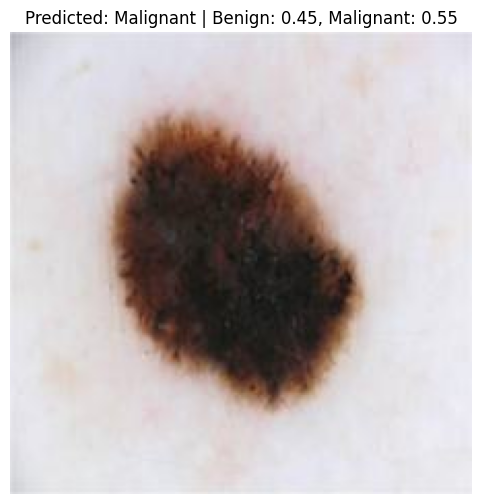

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Function to preprocess and predict an image, then display the result
def predict_and_show_image(image_path, model, class_names, transform, device='cuda'):
    # Load and preprocess the image
    img = Image.open(image_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension
    img_tensor = img_tensor.to(device)

    # Get the model prediction
    model.eval()
    with torch.no_grad():
        logits = model(img_tensor)
        probs = logits.softmax(dim=1)
        _, predicted = torch.max(probs, 1)
        predicted_class = class_names[predicted.item()]
        probabilities = probs.cpu().numpy()

    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(np.array(img))  # Display the image
    plt.title(f'Predicted: {predicted_class} | Benign: {probabilities[0][0]:.2f}, Malignant: {probabilities[0][1]:.2f}')
    plt.axis('off')  # Hide axis
    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/parmesh dissertation folder/train and test data set/Preprocessed_Data/test/Malignant/ISIC_0000013.jpg'  # Replace with your test image path
predict_and_show_image(image_path, model, class_names, test_transform, device='cuda')


# efficientnet latest

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Original train set has 895 samples
Train set has 716 samples
Validation set has 179 samples


100%|██████████| 3/3 [00:00<00:00,  3.38it/s]


[Epoch 1/10] Train Loss: 0.7047, Train Acc: 0.4549, Valid Loss: 0.7063, Valid Acc: 0.3220, Precision: 0.6533, Recall: 0.3240, F1: 0.3411, ROC-AUC: 0.4740


100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


[Epoch 2/10] Train Loss: 0.6851, Train Acc: 0.4753, Valid Loss: 0.7194, Valid Acc: 0.3977, Precision: 0.6344, Recall: 0.3966, F1: 0.4491, ROC-AUC: 0.4294


100%|██████████| 3/3 [00:00<00:00,  3.36it/s]


[Epoch 3/10] Train Loss: 0.6680, Train Acc: 0.4922, Valid Loss: 0.6861, Valid Acc: 0.4628, Precision: 0.6961, Recall: 0.4637, F1: 0.5129, ROC-AUC: 0.5474


100%|██████████| 3/3 [00:00<00:00,  3.32it/s]


[Epoch 4/10] Train Loss: 0.6445, Train Acc: 0.5434, Valid Loss: 0.6668, Valid Acc: 0.4888, Precision: 0.7423, Recall: 0.4972, F1: 0.5422, ROC-AUC: 0.6573


100%|██████████| 3/3 [00:00<00:00,  3.43it/s]


[Epoch 5/10] Train Loss: 0.6443, Train Acc: 0.5477, Valid Loss: 0.6436, Valid Acc: 0.5528, Precision: 0.7865, Recall: 0.5531, F1: 0.5951, ROC-AUC: 0.7159


100%|██████████| 3/3 [00:00<00:00,  3.46it/s]


[Epoch 6/10] Train Loss: 0.6404, Train Acc: 0.5729, Valid Loss: 0.6340, Valid Acc: 0.5659, Precision: 0.7987, Recall: 0.5642, F1: 0.6052, ROC-AUC: 0.7440


100%|██████████| 3/3 [00:00<00:00,  3.40it/s]


[Epoch 7/10] Train Loss: 0.6119, Train Acc: 0.5929, Valid Loss: 0.6281, Valid Acc: 0.5556, Precision: 0.7850, Recall: 0.5475, F1: 0.5895, ROC-AUC: 0.7571


100%|██████████| 3/3 [00:00<00:00,  3.45it/s]


[Epoch 8/10] Train Loss: 0.6077, Train Acc: 0.6259, Valid Loss: 0.6191, Valid Acc: 0.5541, Precision: 0.7960, Recall: 0.5531, F1: 0.5941, ROC-AUC: 0.7742


100%|██████████| 3/3 [00:00<00:00,  3.35it/s]


[Epoch 9/10] Train Loss: 0.5770, Train Acc: 0.6502, Valid Loss: 0.6154, Valid Acc: 0.5580, Precision: 0.7879, Recall: 0.5587, F1: 0.6006, ROC-AUC: 0.7748


100%|██████████| 3/3 [00:00<00:00,  3.42it/s]


[Epoch 10/10] Train Loss: 0.5778, Train Acc: 0.6463, Valid Loss: 0.6062, Valid Acc: 0.5816, Precision: 0.7922, Recall: 0.5754, F1: 0.6169, ROC-AUC: 0.7812

Best Epoch Results for EfficientNet-B0:
Best Epoch: 10
F1 Score: 0.6169
ROC-AUC: 0.7812
Precision: 0.7922
Recall: 0.5754
Validation Accuracy: 0.5816
Validation Loss: 0.6062


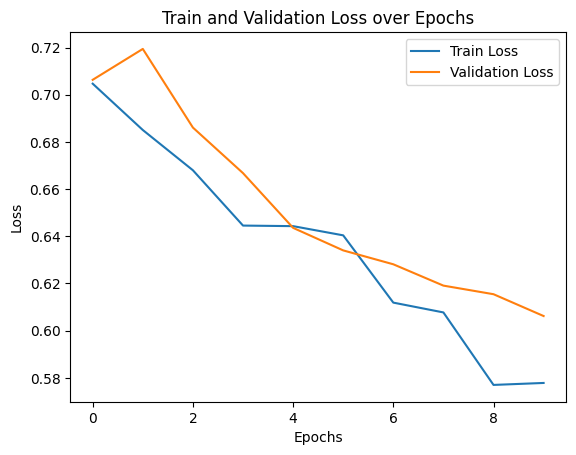

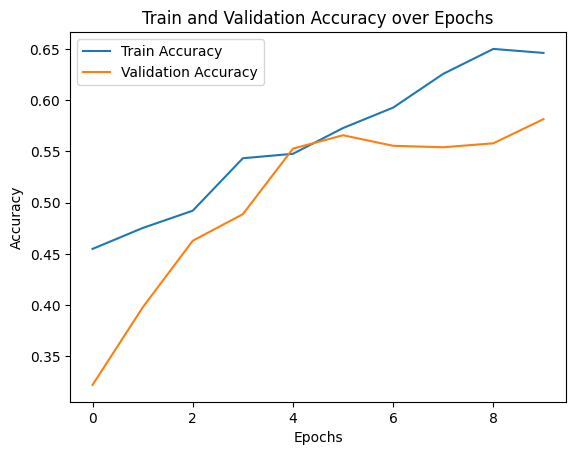

<ipython-input-31-6eddd5804bf7>:204: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_efficientnet_model.pth'))
100%|██████████| 6/6 [00:

Test accuracy: 0.5956, Test ROC-AUC: 0.7121


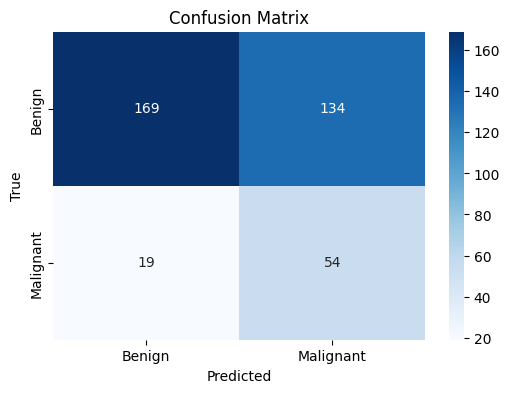

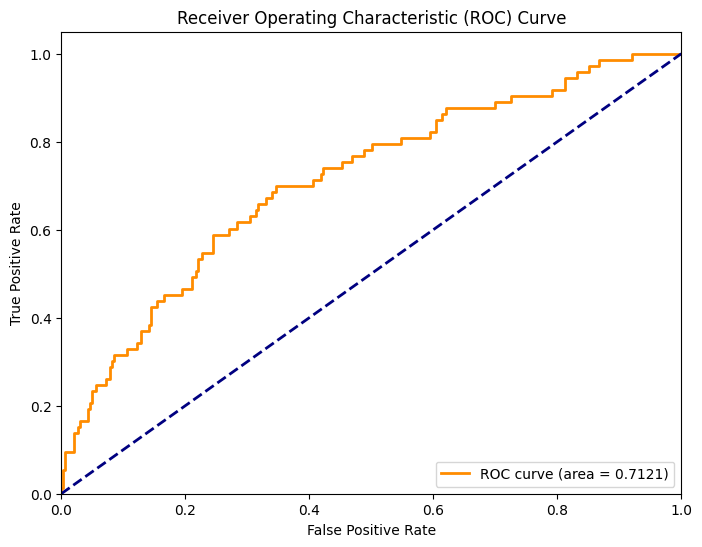

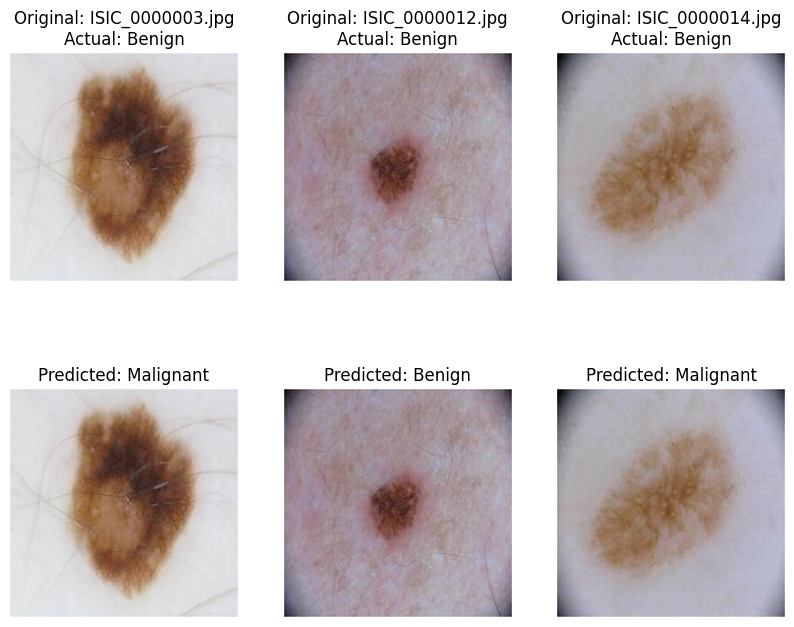

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Subset
from torchvision import datasets, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import os
import torchvision

# Data Preprocessing
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # EfficientNet-B0 expects 224x224 images
    transforms.ToTensor()  # No normalization or augmentation
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()  # No normalization or augmentation
])

# Construct datasets
train_dataset = datasets.ImageFolder("/content/drive/MyDrive/parmesh dissertation folder/train and test data set/Preprocessed_Data/train", transform=train_transform)
test_dataset = datasets.ImageFolder("/content/drive/MyDrive/parmesh dissertation folder/train and test data set/Preprocessed_Data/test", transform=test_transform)

# Train-validation split
train_ratio = 0.8
train_size = int(train_ratio * len(train_dataset))
val_size = len(train_dataset) - train_size

# Splitting dataset indices
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

print(f'Original train set has {len(train_dataset)} samples')
print(f'Train set has {len(train_subset)} samples')
print(f'Validation set has {len(val_subset)} samples')

# Class counts in the dataset
class_counts = [719, 176]  # Benign and Malignant counts in the training set
total_samples = sum(class_counts)

# Calculate class weights (inverse of class frequencies)
class_weights = [total_samples/class_count for class_count in class_counts]
class_weights = torch.FloatTensor(class_weights).to('cuda')

# Weighted loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Batch size
batch_size = 64

# Data loaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
valid_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model: Use pre-trained EfficientNet-B0
model = torchvision.models.efficientnet_b0(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 2)  # Adjust for binary classification
model = model.to('cuda')

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Training setup
n_epochs = 10
best_epoch_results = {}  # Dictionary to store the best epoch metrics

# Lists to store training/validation losses and accuracies
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

# Training and evaluation function
def train_and_evaluate_model(model, criterion, optimizer, train_loader, valid_loader, n_epochs=10):
    best_f1_score = 0
    best_roc_auc = 0
    best_epoch_metrics = {}

    for epoch in range(n_epochs):
        # Training phase
        model.train()
        train_loss = []
        train_accs = []

        for batch in tqdm(train_loader):
            imgs, labels = batch
            imgs, labels = imgs.to('cuda'), labels.to('cuda')

            optimizer.zero_grad()
            logits = model(imgs)
            loss = criterion(logits, labels)  # Use weighted loss
            loss.backward()
            optimizer.step()

            acc = (logits.argmax(dim=-1) == labels).float().mean()
            train_loss.append(loss.item())
            train_accs.append(acc.item())

        train_loss = sum(train_loss) / len(train_loss)
        train_acc = sum(train_accs) / len(train_accs)
        train_loss_epochs.append(train_loss)
        train_acc_epochs.append(train_acc)

        # Validation phase
        model.eval()
        valid_loss = []
        valid_accs = []
        y_true, y_pred = [], []
        y_scores = []

        with torch.no_grad():
            for batch in tqdm(valid_loader):
                imgs, labels = batch
                imgs, labels = imgs.to('cuda'), labels.to('cuda')
                logits = model(imgs)
                loss = criterion(logits, labels)

                acc = (logits.argmax(dim=-1) == labels).float().mean()
                valid_loss.append(loss.item())
                valid_accs.append(acc.item())

                y_true.extend(labels.cpu().numpy())
                y_pred.extend(logits.argmax(dim=-1).cpu().numpy())

                probs = logits.softmax(dim=1)[:, 1]  # Probability scores for the positive class (Malignant)
                y_scores.extend(probs.cpu().numpy())

        valid_loss = sum(valid_loss) / len(valid_loss)
        valid_acc = sum(valid_accs) / len(valid_accs)
        valid_loss_epochs.append(valid_loss)
        valid_acc_epochs.append(valid_acc)

        # Calculate precision, recall, F1-score, and ROC-AUC
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_true, y_scores)

        # Save the best model based on F1 and ROC-AUC
        if f1 > best_f1_score and roc_auc > best_roc_auc:
            best_f1_score = f1
            best_roc_auc = roc_auc
            best_epoch_metrics = {
                'epoch': epoch + 1,  # Storing as 1-indexed epoch
                'f1_score': f1,
                'roc_auc': roc_auc,
                'precision': precision,
                'recall': recall,
                'valid_acc': valid_acc,
                'valid_loss': valid_loss
            }
            # Save the model
            torch.save(model.state_dict(), 'best_efficientnet_model.pth')  # Save the best model checkpoint

        print(f"[Epoch {epoch+1}/{n_epochs}] "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}, "
              f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, "
              f"ROC-AUC: {roc_auc:.4f}")

    # Store the best epoch results
    best_epoch_results['EfficientNetB0'] = best_epoch_metrics

# Train the EfficientNet-B0 model
train_and_evaluate_model(model, criterion, optimizer, train_loader, valid_loader, n_epochs=10)

# After training, print the best epoch results
print("\nBest Epoch Results for EfficientNet-B0:")
metrics = best_epoch_results['EfficientNetB0']
print(f"Best Epoch: {metrics['epoch']}")
print(f"F1 Score: {metrics['f1_score']:.4f}")
print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"Validation Accuracy: {metrics['valid_acc']:.4f}")
print(f"Validation Loss: {metrics['valid_loss']:.4f}")

# Plotting loss
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs')
plt.legend()
plt.show()

# Plotting accuracy
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Load the best model for testing
model.load_state_dict(torch.load('best_efficientnet_model.pth'))
model.eval()

# Testing phase
test_accs = []
all_preds = []
all_labels = []
all_scores = []  # To store probability scores

for batch in tqdm(test_loader):
    imgs, labels = batch
    imgs, labels = imgs.to('cuda'), labels.to('cuda')

    with torch.no_grad():
        logits = model(imgs)

    acc = (logits.argmax(dim=-1) == labels).float().mean()
    test_accs.append(acc.item())

    preds = logits.argmax(dim=-1)
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

    probs = logits.softmax(dim=1)[:, 1]  # Probability scores for the positive class (Malignant)
    all_scores.extend(probs.cpu().numpy())

test_acc = sum(test_accs) / len(test_accs)
test_roc_auc = roc_auc_score(all_labels, all_scores)
print(f'Test accuracy: {test_acc:.4f}, Test ROC-AUC: {test_roc_auc:.4f}')

# Confusion matrix
class_names = ['Benign', 'Malignant']
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Function to display and predict images with original filenames
def display_and_predict_images_with_filenames(data_loader, model, class_names, device, num_samples=3):
    model.eval()
    images_so_far = 0
    plt.figure(figsize=(10, 8))

    with torch.no_grad():
        for imgs, labels in data_loader:  # We now use labels to match filenames with ground truth
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)

            # Iterate through the batch
            for i in range(imgs.size()[0]):
                images_so_far += 1

                # Get the original filename
                path, _ = data_loader.dataset.samples[i]
                filename = os.path.basename(path)

                # Convert label index to class name
                actual_class = class_names[labels[i].item()]
                predicted_class = class_names[preds[i].item()]

                # Display the image
                ax = plt.subplot(2, num_samples, images_so_far)
                ax.axis('off')
                img = imgs[i].cpu().numpy().transpose((1, 2, 0))
                img = np.clip(img, 0, 1)

                plt.imshow(img)
                ax.set_title(f'Original: {filename}\nActual: {actual_class}')

                # Display the prediction
                ax = plt.subplot(2, num_samples, images_so_far + num_samples)
                ax.axis('off')
                plt.imshow(img)
                ax.set_title(f'Predicted: {predicted_class}')

                if images_so_far == num_samples:
                    plt.show()
                    return

# Example usage with your test data
display_and_predict_images_with_filenames(test_loader, model, class_names, 'cuda', num_samples=3)



# resnet50 with data augmentation

Original train set has 895 samples
Train set has 716 samples
Validation set has 179 samples


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 174MB/s]
100%|██████████| 3/3 [00:32<00:00, 10.92s/it]


[Epoch 1/10] Train Loss: 0.7030, Train Acc: 0.3581, Valid Loss: 0.6724, Valid Acc: 0.6636, Precision: 0.7506, Recall: 0.6648, F1: 0.6935, ROC-AUC: 0.6282


100%|██████████| 3/3 [00:02<00:00,  1.35it/s]


[Epoch 2/10] Train Loss: 0.6367, Train Acc: 0.5712, Valid Loss: 0.6341, Valid Acc: 0.6806, Precision: 0.7565, Recall: 0.6816, F1: 0.7073, ROC-AUC: 0.7279


100%|██████████| 3/3 [00:02<00:00,  1.37it/s]


[Epoch 3/10] Train Loss: 0.5865, Train Acc: 0.6589, Valid Loss: 0.6376, Valid Acc: 0.6662, Precision: 0.7404, Recall: 0.6704, F1: 0.6959, ROC-AUC: 0.6880


100%|██████████| 3/3 [00:02<00:00,  1.37it/s]


[Epoch 4/10] Train Loss: 0.5459, Train Acc: 0.6849, Valid Loss: 0.6389, Valid Acc: 0.6754, Precision: 0.7464, Recall: 0.6704, F1: 0.6971, ROC-AUC: 0.6711


100%|██████████| 3/3 [00:02<00:00,  1.27it/s]


[Epoch 5/10] Train Loss: 0.5224, Train Acc: 0.7261, Valid Loss: 0.6306, Valid Acc: 0.6465, Precision: 0.7467, Recall: 0.6536, F1: 0.6843, ROC-AUC: 0.7012


100%|██████████| 3/3 [00:02<00:00,  1.12it/s]


[Epoch 6/10] Train Loss: 0.5059, Train Acc: 0.6970, Valid Loss: 0.5982, Valid Acc: 0.6532, Precision: 0.7595, Recall: 0.6536, F1: 0.6858, ROC-AUC: 0.7253


100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


[Epoch 7/10] Train Loss: 0.5017, Train Acc: 0.7287, Valid Loss: 0.6035, Valid Acc: 0.6819, Precision: 0.7688, Recall: 0.6816, F1: 0.7093, ROC-AUC: 0.7257


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


[Epoch 8/10] Train Loss: 0.4935, Train Acc: 0.7205, Valid Loss: 0.6145, Valid Acc: 0.6688, Precision: 0.7651, Recall: 0.6704, F1: 0.7000, ROC-AUC: 0.6954


100%|██████████| 3/3 [00:02<00:00,  1.38it/s]


[Epoch 9/10] Train Loss: 0.5108, Train Acc: 0.7391, Valid Loss: 0.6026, Valid Acc: 0.6935, Precision: 0.7747, Recall: 0.6983, F1: 0.7233, ROC-AUC: 0.7263


100%|██████████| 3/3 [00:02<00:00,  1.38it/s]


[Epoch 10/10] Train Loss: 0.5092, Train Acc: 0.7305, Valid Loss: 0.6002, Valid Acc: 0.6805, Precision: 0.7646, Recall: 0.6872, F1: 0.7130, ROC-AUC: 0.7242

Best Epoch Results for ResNet50:
Best Epoch: 2
F1 Score: 0.7073
ROC-AUC: 0.7279
Precision: 0.7565
Recall: 0.6816
Validation Accuracy: 0.6806
Validation Loss: 0.6341


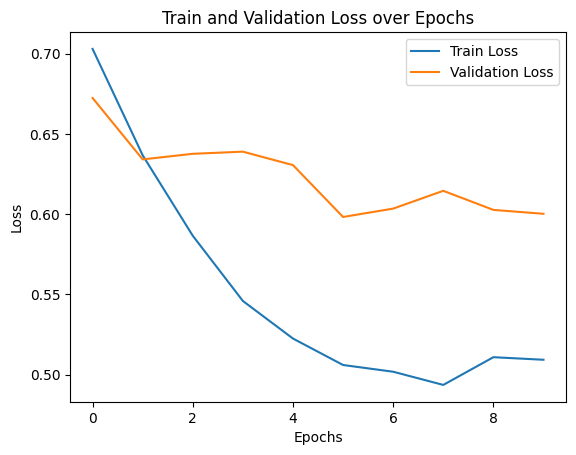

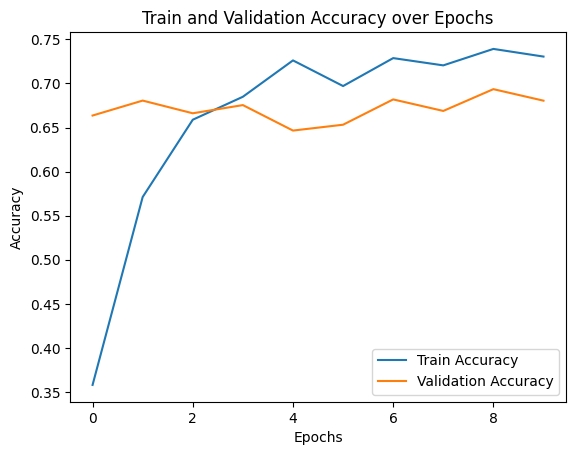

<ipython-input-2-e279949de80e>:213: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_resnet50_model.pth'))
100%|██████████| 6/6 [05:27<00

Test accuracy: 0.6068, Test ROC-AUC: 0.7311


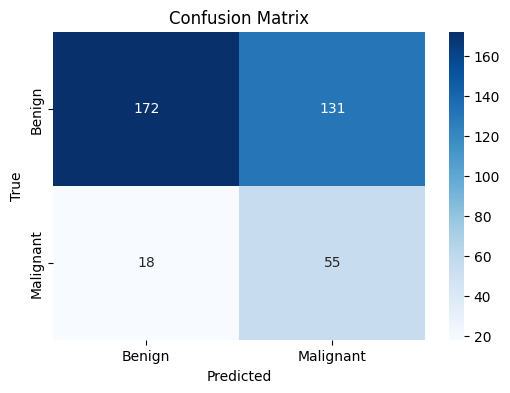

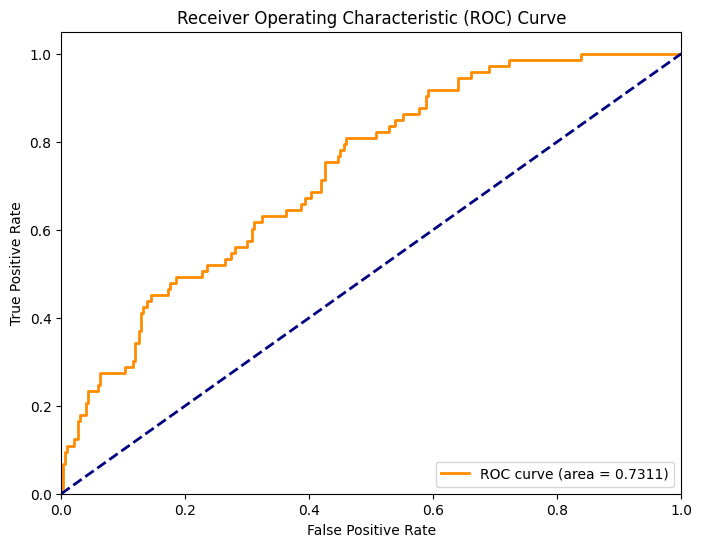

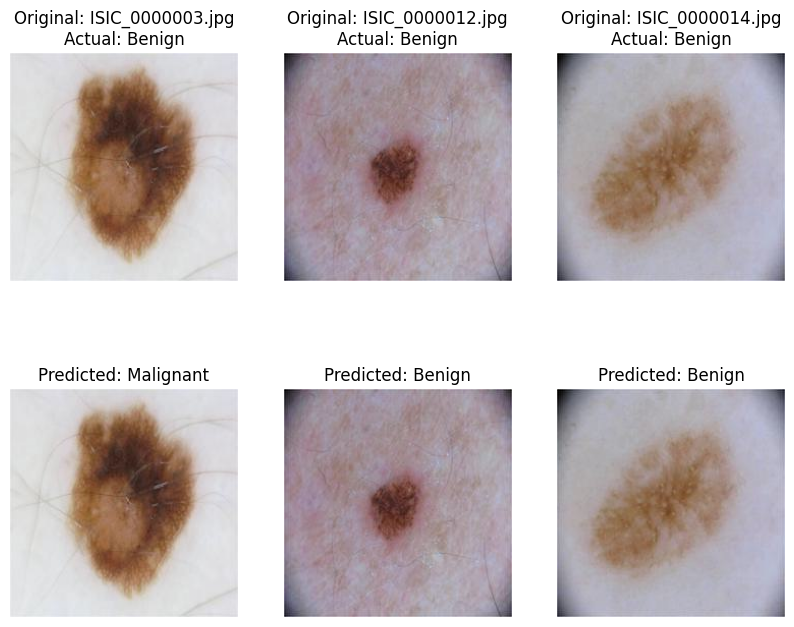

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import os
import torchvision

# Data Preprocessing with Augmentation for the training set
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Data augmentation: Randomly flip the image horizontally
    transforms.RandomRotation(10),      # Data augmentation: Randomly rotate the image
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Random color jitter
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()  # No data augmentation for test data
])

# Construct datasets
train_dataset = datasets.ImageFolder("/content/drive/MyDrive/parmesh dissertation folder/train and test data set/Preprocessed_Data/train", transform=train_transform)
test_dataset = datasets.ImageFolder("/content/drive/MyDrive/parmesh dissertation folder/train and test data set/Preprocessed_Data/test", transform=test_transform)

# Train-validation split
train_ratio = 0.8
train_size = int(train_ratio * len(train_dataset))
val_size = len(train_dataset) - train_size

# Splitting dataset indices
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

print(f'Original train set has {len(train_dataset)} samples')
print(f'Train set has {len(train_subset)} samples')
print(f'Validation set has {len(val_subset)} samples')

# Class counts in the dataset
class_counts = [719, 176]  # Benign and Malignant counts in the training set
total_samples = sum(class_counts)

# Calculate class weights (inverse of class frequencies)
class_weights = [total_samples/class_count for class_count in class_counts]
class_weights = torch.FloatTensor(class_weights).to('cuda')

# Weighted loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Batch size
batch_size = 64

# Data loaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
valid_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model: Use pre-trained ResNet50
model = torchvision.models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # Adjust for binary classification
model = model.to('cuda')

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training setup
n_epochs = 10
best_epoch_results = {}  # Dictionary to store the best epoch metrics

# Lists to store training/validation losses and accuracies
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

# Training and evaluation function
def train_and_evaluate_model(model, criterion, optimizer, train_loader, valid_loader, scheduler, n_epochs=10):
    best_f1_score = 0
    best_roc_auc = 0
    best_epoch_metrics = {}

    for epoch in range(n_epochs):
        # Training phase
        model.train()
        train_loss = []
        train_accs = []

        for batch in tqdm(train_loader):
            imgs, labels = batch
            imgs, labels = imgs.to('cuda'), labels.to('cuda')

            optimizer.zero_grad()
            logits = model(imgs)
            loss = criterion(logits, labels)  # Use weighted loss
            loss.backward()
            optimizer.step()

            acc = (logits.argmax(dim=-1) == labels).float().mean()
            train_loss.append(loss.item())
            train_accs.append(acc.item())

        train_loss = sum(train_loss) / len(train_loss)
        train_acc = sum(train_accs) / len(train_accs)
        train_loss_epochs.append(train_loss)
        train_acc_epochs.append(train_acc)

        # Validation phase
        model.eval()
        valid_loss = []
        valid_accs = []
        y_true, y_pred = [], []
        y_scores = []

        with torch.no_grad():
            for batch in tqdm(valid_loader):
                imgs, labels = batch
                imgs, labels = imgs.to('cuda'), labels.to('cuda')
                logits = model(imgs)
                loss = criterion(logits, labels)

                acc = (logits.argmax(dim=-1) == labels).float().mean()
                valid_loss.append(loss.item())
                valid_accs.append(acc.item())

                y_true.extend(labels.cpu().numpy())
                y_pred.extend(logits.argmax(dim=-1).cpu().numpy())

                probs = logits.softmax(dim=1)[:, 1]  # Probability scores for the positive class (Malignant)
                y_scores.extend(probs.cpu().numpy())

        valid_loss = sum(valid_loss) / len(valid_loss)
        valid_acc = sum(valid_accs) / len(valid_accs)
        valid_loss_epochs.append(valid_loss)
        valid_acc_epochs.append(valid_acc)

        # Calculate precision, recall, F1-score, and ROC-AUC
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_true, y_scores)

        # Save the best model based on F1 and ROC-AUC
        if f1 > best_f1_score and roc_auc > best_roc_auc:
            best_f1_score = f1
            best_roc_auc = roc_auc
            best_epoch_metrics = {
                'epoch': epoch + 1,  # Storing as 1-indexed epoch
                'f1_score': f1,
                'roc_auc': roc_auc,
                'precision': precision,
                'recall': recall,
                'valid_acc': valid_acc,
                'valid_loss': valid_loss
            }
            # Save the model
            torch.save(model.state_dict(), 'best_resnet50_model.pth')  # Save the best model checkpoint

        print(f"[Epoch {epoch+1}/{n_epochs}] "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}, "
              f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, "
              f"ROC-AUC: {roc_auc:.4f}")

        # Step the scheduler after each epoch
        scheduler.step()

    # Store the best epoch results
    best_epoch_results['ResNet50'] = best_epoch_metrics

# Train the ResNet50 model
train_and_evaluate_model(model, criterion, optimizer, train_loader, valid_loader, scheduler, n_epochs=10)

# After training, print the best epoch results
print("\nBest Epoch Results for ResNet50:")
metrics = best_epoch_results['ResNet50']
print(f"Best Epoch: {metrics['epoch']}")
print(f"F1 Score: {metrics['f1_score']:.4f}")
print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"Validation Accuracy: {metrics['valid_acc']:.4f}")
print(f"Validation Loss: {metrics['valid_loss']:.4f}")

# Plotting loss
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs')
plt.legend()
plt.show()

# Plotting accuracy
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs')
plt.legend()
plt.show()

# Load the best model for testing
model.load_state_dict(torch.load('best_resnet50_model.pth'))
model.eval()

# Testing phase
test_accs = []
all_preds = []
all_labels = []
all_scores = []  # To store probability scores

for batch in tqdm(test_loader):
    imgs, labels = batch
    imgs, labels = imgs.to('cuda'), labels.to('cuda')

    with torch.no_grad():
        logits = model(imgs)

    acc = (logits.argmax(dim=-1) == labels).float().mean()
    test_accs.append(acc.item())

    preds = logits.argmax(dim=-1)
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

    probs = logits.softmax(dim=1)[:, 1]  # Probability scores for the positive class (Malignant)
    all_scores.extend(probs.cpu().numpy())

test_acc = sum(test_accs) / len(test_accs)
test_roc_auc = roc_auc_score(all_labels, all_scores)
print(f'Test accuracy: {test_acc:.4f}, Test ROC-AUC: {test_roc_auc:.4f}')

# Confusion matrix
class_names = ['Benign', 'Malignant']
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Function to display and predict images with original filenames
def display_and_predict_images_with_filenames(data_loader, model, class_names, device, num_samples=3):
    model.eval()
    images_so_far = 0
    plt.figure(figsize=(10, 8))

    with torch.no_grad():
        for imgs, labels in data_loader:  # We now use labels to match filenames with ground truth
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)

            # Iterate through the batch
            for i in range(imgs.size()[0]):
                images_so_far += 1

                # Get the original filename
                path, _ = data_loader.dataset.samples[i]
                filename = os.path.basename(path)

                # Convert label index to class name
                actual_class = class_names[labels[i].item()]
                predicted_class = class_names[preds[i].item()]

                # Display the image
                ax = plt.subplot(2, num_samples, images_so_far)
                ax.axis('off')
                img = imgs[i].cpu().numpy().transpose((1, 2, 0))
                img = np.clip(img, 0, 1)

                plt.imshow(img)
                ax.set_title(f'Original: {filename}\nActual: {actual_class}')

                # Display the prediction
                ax = plt.subplot(2, num_samples, images_so_far + num_samples)
                ax.axis('off')
                plt.imshow(img)
                ax.set_title(f'Predicted: {predicted_class}')

                if images_so_far == num_samples:
                    plt.show()
                    return

# Example usage with your test data
display_and_predict_images_with_filenames(test_loader, model, class_names, 'cuda', num_samples=3)

